In [6]:
# imports
import numpy as np
import wget
from os import path
import random
import matplotlib.pyplot as plt

# numpy conf
np.set_printoptions(precision=3, suppress=True)

In [7]:
# Descargar dataset
# Breast Cancer Wisconsin (Diagnostic) Data Set
# http://mlr.cs.umass.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

dataset_url = 'http://mlr.cs.umass.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
dataset_localfilename = 'wdbc.data'
if not path.exists(dataset_localfilename):
    wget.download(dataset_url, dataset_localfilename)

In [8]:
# Necesito reemplazar M (maligno) y B (benigno) por valores númericos en el dataset
def replace(file_path, save_path):
    with open(save_path, 'x') as new_file:
        with open(file_path) as old_file:
            for line in old_file:
                if "M" in line :
                    new_file.write( line.replace( "M", "1" ) )
                if "B" in line :
                    new_file.write( line.replace( "B", "0" ) )

dataset_localfilename_edited = 'wdbc_edited.data'
if not path.exists(dataset_localfilename_edited):
    replace(dataset_localfilename, dataset_localfilename_edited)

In [9]:
# Carga del dataset
dataset_raw = np.genfromtxt(dataset_localfilename_edited, delimiter=',', dtype=float)
print('Dataset size: {}'.format(dataset_raw.shape))

# imprimimos las primeras 4 filas para ver qué tipo de datos tenemos
print('First 4 rows:')
print(dataset_raw[0:4,:])

Dataset size: (569, 32)
First 4 rows:
[[  842302.           1.          17.99        10.38       122.8
      1001.           0.118        0.278        0.3          0.147
         0.242        0.079        1.095        0.905        8.589
       153.4          0.006        0.049        0.054        0.016
         0.03         0.006       25.38        17.33       184.6
      2019.           0.162        0.666        0.712        0.265
         0.46         0.119]
 [  842517.           1.          20.57        17.77       132.9
      1326.           0.085        0.079        0.087        0.07
         0.181        0.057        0.543        0.734        3.398
        74.08         0.005        0.013        0.019        0.013
         0.014        0.004       24.99        23.41       158.8
      1956.           0.124        0.187        0.242        0.186
         0.275        0.089]
 [84300903.           1.          19.69        21.25       130.
      1203.           0.11         0.16      

In [10]:
# Seleccionamos etiquetas e instancias
X = dataset_raw[:,2:]
y = dataset_raw[:,1]

# chequeamos los tamaños de nuestros nuevos conjuntos
print('X size: {}'.format(X.shape))
print('y size: {}'.format(y.shape))

# imprimimos las primeras 4 filas
print('First 4 rows from the design matrix:')
print(X[0:4,:])
print('First 4 labels from the labels array:')
print(y[0:4])

# Contamos la cantidad de elementos con cada etiqueta 
print(np.unique(y, return_counts=True))

X size: (569, 30)
y size: (569,)
First 4 rows from the design matrix:
[[  17.99    10.38   122.8   1001.       0.118    0.278    0.3      0.147
     0.242    0.079    1.095    0.905    8.589  153.4      0.006    0.049
     0.054    0.016    0.03     0.006   25.38    17.33   184.6   2019.
     0.162    0.666    0.712    0.265    0.46     0.119]
 [  20.57    17.77   132.9   1326.       0.085    0.079    0.087    0.07
     0.181    0.057    0.543    0.734    3.398   74.08     0.005    0.013
     0.019    0.013    0.014    0.004   24.99    23.41   158.8   1956.
     0.124    0.187    0.242    0.186    0.275    0.089]
 [  19.69    21.25   130.    1203.       0.11     0.16     0.197    0.128
     0.207    0.06     0.746    0.787    4.585   94.03     0.006    0.04
     0.038    0.021    0.022    0.005   23.57    25.53   152.5   1709.
     0.144    0.424    0.45     0.243    0.361    0.088]
 [  11.42    20.38    77.58   386.1      0.142    0.284    0.241    0.105
     0.26     0.097    0.496  

In [11]:
# calculamos la cantidad de muestras de entrenamiento/validación y test
n_trainval = round(0.7 * X.shape[0])
n_test = X.shape[0] - n_trainval

# vamos a generar una secuencia de índices de 0 al total de muestras, con la que
# representaremos cada muestra en nuestra matriz de diseño
idx = list(range(0,X.shape[0]))
print('First 5 indices (without shuffling): {}'.format(idx[0:5]))

# ahora vamos a aleatorizar el orden de esta lista, para que ya no sean 
# consecutivos
random.shuffle(idx)
print('First 5 indices (after shuffling): {}'.format(idx[0:5]))

# si extraemos las primeras n_trainval muestras de X usando los índices
# aleatorizados que hemos generado, esto equivale a tomar unas muestra aleatoria
X_trainval = X[idx[0:n_trainval],:]
y_trainval = y[idx[0:n_trainval]]
X_test = X[idx[n_trainval:],:]
y_test = y[idx[n_trainval:]]

# verificamos sus tamaños
print('Train/val set size: {}'.format(X_trainval.shape))
print('Test set size: {}'.format(X_test.shape))

First 5 indices (without shuffling): [0, 1, 2, 3, 4]
First 5 indices (after shuffling): [148, 33, 418, 527, 126]
Train/val set size: (398, 30)
Test set size: (171, 30)


In [12]:
# calculamos la cantidad de muestras de entrenamiento y validación
n_train = round(0.9 * X_trainval.shape[0])
n_val = X_trainval.shape[0] - n_train

# si extraemos las primeras n_trainval muestras de X usando los índices
# aleatorizados que hemos generado, esto equivale a tomar unas muestra aleatoria
X_train = X[idx[0:n_train],:]
y_train = y[idx[0:n_train]]
X_val = X[idx[n_train:n_train+n_val],:]
y_val = y[idx[n_train:n_train+n_val]]

# verificamos sus tamaños
print('Training set size: {}'.format(X_train.shape))
print('Validation set size: {}'.format(X_val.shape))
print('Test set size: {}'.format(X_test.shape))

Training set size: (358, 30)
Validation set size: (40, 30)
Test set size: (171, 30)


In [13]:
# Imprimimos el porcentaje de instancias con cada una de las dos etiquetas para dataset, train y validation
print(np.unique(y, return_counts=True)[1]/np.size(y))
print(np.unique(y_train, return_counts=True)[1]/np.size(y_train))
print(np.unique(y_val, return_counts=True)[1]/np.size(y_val))

[0.627 0.373]
[0.645 0.355]
[0.65 0.35]


In [14]:
# definimos un diccionario con tags para las features que vamos a mantener y sus
# descriptiones
feature_labels = dict()
feature_labels['RAD1']='radius (mean of distances from center to points on the perimeter)'
feature_labels['TEX1']='texture (standard deviation of gray-scale values)'
feature_labels['PER1']='perimeter'
feature_labels['AREA1']='area'
feature_labels['SMO1']='smoothness (local variation in radius lengths)'
feature_labels['COMP1']='compactness (perimeter^2 / area - 1.0)'
feature_labels['CONC1']='concavity (severity of concave portions of the contour)'
feature_labels['CONCP1']='concave points (number of concave portions of the contour)'
feature_labels['SYM1']='índice de accessibilidad a carreteras radiales'
feature_labels['FRD1']='fractal dimension ("coastline approximation" - 1)'
feature_labels['RAD2']='radius (mean of distances from center to points on the perimeter)'
feature_labels['TEX2']='texture (standard deviation of gray-scale values)'
feature_labels['PER2']='perimeter'
feature_labels['AREA2']='area'
feature_labels['SMO2']='smoothness (local variation in radius lengths)'
feature_labels['COMP2']='compactness (perimeter^2 / area - 1.0)'
feature_labels['CONC2']='concavity (severity of concave portions of the contour)'
feature_labels['CONCP2']='concave points (number of concave portions of the contour)'
feature_labels['SYM2']='índice de accessibilidad a carreteras radiales'
feature_labels['FRD2']='fractal dimension ("coastline approximation" - 1)'
feature_labels['RAD3']='radius (mean of distances from center to points on the perimeter)'
feature_labels['TEX3']='texture (standard deviation of gray-scale values)'
feature_labels['PER3']='perimeter'
feature_labels['AREA3']='area'
feature_labels['SMO3']='smoothness (local variation in radius lengths)'
feature_labels['COMP3']='compactness (perimeter^2 / area - 1.0)'
feature_labels['CONC3']='concavity (severity of concave portions of the contour)'
feature_labels['CONCP3']='concave points (number of concave portions of the contour)'
feature_labels['SYM3']='índice de accessibilidad a carreteras radiales'
feature_labels['FRD3']='fractal dimension ("coastline approximation" - 1)'

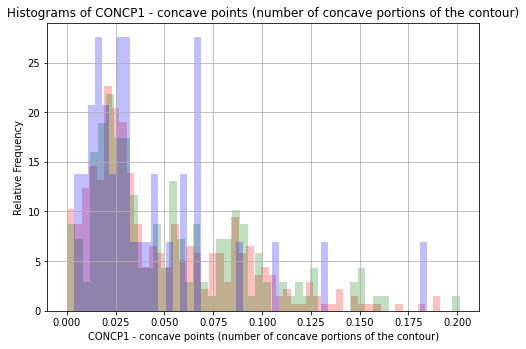

In [19]:
# modificar esta variable con el índice de la feature que se quiere analizar
variable_to_print = 7
relative_frequency = True
# modificar esta variable para determinar el número de baldes que vamos a usar
n_bins = 50
# recuperamos su tag y un string con su tag y descripción
tag = list(feature_labels.keys())[variable_to_print]
feature_id_and_description = tag + ' - ' + feature_labels[tag]

# creamos el canvas de la figura
fig=plt.figure()
# agregamos los ejes
ax=fig.add_axes([0,0,1,1])
# hacemos histogramas de 50 baldes para los datos de entrenamiento, validación y
# test, en los colores azul (b), verde (g) y rojo (r), con cierta transparencia 
# alpha
ax.hist(X_train[:,variable_to_print], n_bins, density=relative_frequency, facecolor='r', alpha=0.25)
ax.hist(X_test[:,variable_to_print], n_bins, density=relative_frequency, facecolor='g', alpha=0.25)
ax.hist(X_val[:,variable_to_print], n_bins, density=relative_frequency, facecolor='b', alpha=0.25)
# agregamos las etiquetas de los ejes x e y
ax.set_xlabel(feature_id_and_description)
if relative_frequency:
  ax.set_ylabel('Relative Frequency')
else:
  ax.set_ylabel('Absolute Frequency')
# le colocamos un título
ax.set_title('Histograms of {}'.format(feature_id_and_description))
ax.grid(True)
# lo mostramos por pantalla
plt.show()